In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gradAd = pd.read_csv('Graduate Admissions.csv')
gradAd.drop('Serial No.',axis = 1,inplace = True)
gradAd.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
def bootstrap(sample,runs):
    ls = []
    n = sample.shape[0]
    for _ in range(runs):
        sum = 0
        for i in range(n):
            r = np.floor(np.random.random()*n)
            sum += sample[r]
        ls.append(sum/n)
    plt.hist(ls,bins = 100)
    ls.sort()
    return ls

In [4]:
def getbounds(ls,confidence):
    confidence /= 2
    n = len(ls)
    lb = int(np.floor(confidence * n)/100)
    ub = int(np.floor((100-confidence)*n/100))
    return ls[lb],ls[ub]

In [5]:
nores = gradAd[gradAd['Research'] == 0]
nores.index = np.arange(nores.shape[0])
res = gradAd[gradAd['Research'] == 1]
res.index = np.arange(res.shape[0])

In [6]:
nores

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,314,103,2,2.0,3.0,8.21,0,0.65
1,308,101,2,3.0,4.0,7.90,0,0.68
2,302,102,1,2.0,1.5,8.00,0,0.50
3,323,108,3,3.5,3.0,8.60,0,0.45
4,314,105,3,3.5,2.5,8.30,0,0.54
...,...,...,...,...,...,...,...,...
215,327,115,4,3.5,4.0,9.14,0,0.79
216,302,110,3,4.0,4.5,8.50,0,0.65
217,297,99,4,3.0,3.5,7.81,0,0.54
218,312,103,4,4.0,5.0,8.43,0,0.73


# **Research and GRE score**

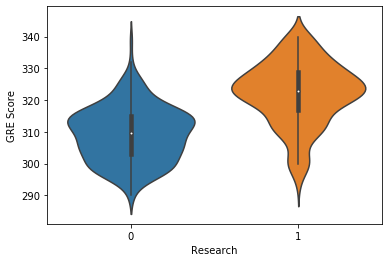

In [7]:
sns.violinplot(x = 'Research',y = 'GRE Score', data = gradAd)

In [8]:
gradAd['GRE Score'].groupby(gradAd['Research']).mean()

Research
0    309.300000
1    322.107143
Name: GRE Score, dtype: float64

[319.75,
 319.86071428571427,
 319.94642857142856,
 320.125,
 320.1714285714286,
 320.2214285714286,
 320.23571428571427,
 320.25,
 320.25714285714287,
 320.26785714285717,
 320.3392857142857,
 320.37857142857143,
 320.3857142857143,
 320.4107142857143,
 320.41785714285714,
 320.4714285714286,
 320.4714285714286,
 320.475,
 320.475,
 320.4892857142857,
 320.5,
 320.55,
 320.55357142857144,
 320.5571428571429,
 320.5607142857143,
 320.5678571428571,
 320.5678571428571,
 320.575,
 320.575,
 320.5857142857143,
 320.60357142857146,
 320.60714285714283,
 320.61071428571427,
 320.625,
 320.625,
 320.63214285714287,
 320.6357142857143,
 320.63928571428573,
 320.6607142857143,
 320.675,
 320.6857142857143,
 320.6928571428571,
 320.69642857142856,
 320.7,
 320.7035714285714,
 320.7142857142857,
 320.7142857142857,
 320.71785714285716,
 320.7214285714286,
 320.73571428571427,
 320.73571428571427,
 320.73571428571427,
 320.74642857142857,
 320.75714285714287,
 320.7607142857143,
 320.760714285714

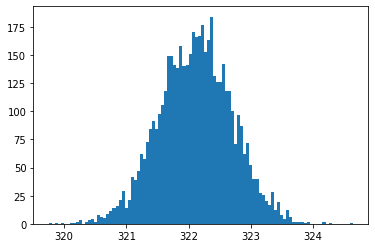

In [9]:
#bootstrap
bootstrap(res['GRE Score'], 5000)

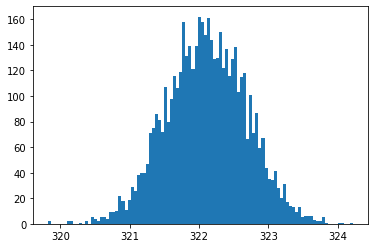

In [10]:
ls = bootstrap(nores['GRE Score']-nores['GRE Score'].mean()+res['GRE Score'].mean(),5000)

In [11]:
lb,hb = getbounds(ls,5)


In [12]:
lb

320.9980519480512

In [13]:
hb

323.225324675324

# **Research and TOEFL score**

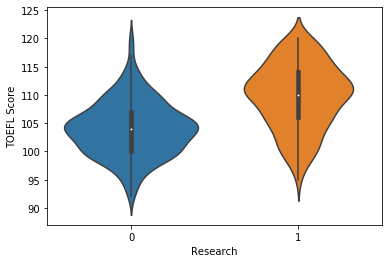

In [14]:
sns.violinplot(x = 'Research',y = 'TOEFL Score', data = gradAd)

In [15]:
gradAd['TOEFL Score'].groupby(gradAd['Research']).mean()

Research
0    103.990909
1    109.707143
Name: TOEFL Score, dtype: float64

[108.38214285714285,
 108.44285714285714,
 108.57142857142857,
 108.6,
 108.63214285714285,
 108.65,
 108.70714285714286,
 108.73214285714286,
 108.74285714285715,
 108.74285714285715,
 108.75357142857143,
 108.75714285714285,
 108.77142857142857,
 108.78214285714286,
 108.79642857142858,
 108.79642857142858,
 108.8,
 108.80357142857143,
 108.81071428571428,
 108.825,
 108.825,
 108.83571428571429,
 108.83571428571429,
 108.83928571428571,
 108.83928571428571,
 108.85,
 108.85,
 108.85357142857143,
 108.86428571428571,
 108.87142857142857,
 108.875,
 108.88214285714285,
 108.88571428571429,
 108.88571428571429,
 108.88928571428572,
 108.9,
 108.9,
 108.9,
 108.9,
 108.9,
 108.90357142857142,
 108.91071428571429,
 108.91428571428571,
 108.91785714285714,
 108.925,
 108.92857142857143,
 108.92857142857143,
 108.92857142857143,
 108.92857142857143,
 108.93214285714286,
 108.93571428571428,
 108.93928571428572,
 108.93928571428572,
 108.94285714285714,
 108.94285714285714,
 108.94642857142

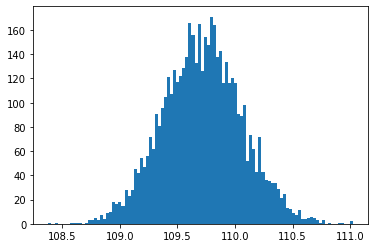

In [16]:
#bootstrap
bootstrap(res['TOEFL Score'], 5000)

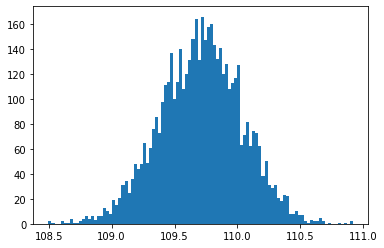

In [17]:
ls = bootstrap(nores['TOEFL Score']-nores['TOEFL Score'].mean()+res['TOEFL Score'].mean(),5000)

In [18]:
lb,hb = getbounds(ls,5)

In [19]:
lb

109.0662337662339

In [20]:
hb

110.33896103896119